**Importing Dataset into "Google Colab"**

**1(a) : Building four models using "K-Nearest-neighbors", "Naive-Bayes", "Support Vector Machine", "Decision Tree" Algorithms.**

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving bank-additional-full.csv to bank-additional-full.csv


**Importing required libraries and converting the dataset into dataframe object using "pandas" python data analysis library.**

In [ ]:
import pandas as pd 
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
df = pd.read_csv('bank-additional-full.csv',sep = ';')
print(df)

       age          job  marital  ... euribor3m nr.employed    y
0       56    housemaid  married  ...     4.857      5191.0   no
1       57     services  married  ...     4.857      5191.0   no
2       37     services  married  ...     4.857      5191.0   no
3       40       admin.  married  ...     4.857      5191.0   no
4       56     services  married  ...     4.857      5191.0   no
...    ...          ...      ...  ...       ...         ...  ...
41183   73      retired  married  ...     1.028      4963.6  yes
41184   46  blue-collar  married  ...     1.028      4963.6   no
41185   56      retired  married  ...     1.028      4963.6   no
41186   44   technician  married  ...     1.028      4963.6  yes
41187   74      retired  married  ...     1.028      4963.6   no

[41188 rows x 21 columns]


**Label Encoding of 'month' and 'day_of_week' features**

In [ ]:
label_encoder1 = preprocessing.LabelEncoder()
label_encoder2 = preprocessing.LabelEncoder()
df['month'] = label_encoder1.fit_transform(df['month'].astype(str)) 
df['day_of_week'] = label_encoder2.fit_transform(df['day_of_week'].astype(str))

**Implementing our own user defined function namely "encode_and_bind" which will perform "One-hot-encoding" and binds those columns to our original dataframe.**

In [ ]:
def encode_and_bind(df,feature_to_encode):
    dummies = pd.get_dummies(df[[feature_to_encode]])
    df = pd.concat([df,dummies],axis=1)
    df = df.drop([feature_to_encode],axis=1)
    return(df)

**Selecting the categorical columns which are not ordinal for "One-hot-encoding".**

In [ ]:
features_to_encode = ['job', 'marital', 'education', 'default','housing','loan','contact','poutcome'] 
for feature in features_to_encode:
    df = encode_and_bind(df,feature)

In [ ]:
df

,age,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,6,1,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
1,57,6,1,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0
2,37,6,1,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0
3,40,6,1,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
4,56,6,1,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,7,0,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0
41184,46,7,0,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
41185,56,7,0,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,no,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0
41186,44,7,0,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0


**Since our class label is 'y', we are label-encoding it with the help of "map" function.**

In [ ]:
df.y = df.y.map({'no':0, 'yes':1}).astype('uint8')
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
age,56.000,57.000,37.000,40.000,56.000,45.000,59.000,41.000,24.000,25.000
month,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000
day_of_week,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
duration,261.000,149.000,226.000,151.000,307.000,198.000,139.000,217.000,380.000,50.000
campaign,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
pdays,999.000,999.000,999.000,999.000,999.000,999.000,999.000,999.000,999.000,999.000
previous,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
emp.var.rate,1.100,1.100,1.100,1.100,1.100,1.100,1.100,1.100,1.100,1.100
cons.price.idx,93.994,93.994,93.994,93.994,93.994,93.994,93.994,93.994,93.994,93.994
cons.conf.idx,-36.400,-36.400,-36.400,-36.400,-36.400,-36.400,-36.400,-36.400,-36.400,-36.400


In [ ]:
#Checking the number of rows and columns in the dataset
df.shape

(41188, 51)

In [ ]:
#Renaming the column 'y' to 'Outcome'
df = df.rename(columns={'y': 'Outcome'})

In [ ]:
#Applying Transpose Operation which will convert rows to columns and columns to rows
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
age,56.000,57.000,37.000,40.000,56.000,45.000,59.000,41.000,24.000,25.000
month,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000
day_of_week,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
duration,261.000,149.000,226.000,151.000,307.000,198.000,139.000,217.000,380.000,50.000
campaign,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
pdays,999.000,999.000,999.000,999.000,999.000,999.000,999.000,999.000,999.000,999.000
previous,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
emp.var.rate,1.100,1.100,1.100,1.100,1.100,1.100,1.100,1.100,1.100,1.100
cons.price.idx,93.994,93.994,93.994,93.994,93.994,93.994,93.994,93.994,93.994,93.994
cons.conf.idx,-36.400,-36.400,-36.400,-36.400,-36.400,-36.400,-36.400,-36.400,-36.400,-36.400


In [ ]:
#Creating a dataframe with all the training data excluding the target column ie.,Outcome.
X = df.drop(columns=['Outcome'])
#Checking that the target variable has been removed
X.head()

,age,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,6,1,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
1,57,6,1,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0
2,37,6,1,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0
3,40,6,1,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
4,56,6,1,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0


In [ ]:
#Here, We are inserting the ‘Outcome’ column into our target variable (y).
#In this step we have successfully separated the target values.
y = df['Outcome'].values

In [ ]:
#Viewing the target values
y[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [ ]:
#Importing 'train_test_split' function from 'Scikit-learn' library.
from sklearn.model_selection import train_test_split
#splitting the dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 33, random_state=1, stratify=y)

**K-Nearest-Neighbors Model Building**

In [ ]:
#Buidling and Training the model
from sklearn.neighbors import KNeighborsClassifier
# Creating KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors = 3)
# Fitting the classifier to the data
knn_classifier = knn_classifier.fit(X_train,y_train)

In [ ]:
#show first 5 model predictions on the test data
y_prediction = knn_classifier.predict(X_test)

In [ ]:
#checking the accuracy of our model on the test data
knn_classifier.score(X_test, y_test)

0.8181818181818182

**Implementing "K-Fold-Cross-Validation"**

In [ ]:
from sklearn.model_selection import cross_val_score
#creating a new KNN model
knn_cross_val = KNeighborsClassifier(n_neighbors=3)
#training our model with cross value of 5 
cross_val_scores = cross_val_score(knn_cross_val, X, y, cv=5)
print(cross_val_scores)
print('cross_val_scores mean:{}'.format(np.mean(cross_val_scores)))

[0.87594076 0.86283078 0.85445496 0.68022338 0.58431468]
cross_val_scores mean:0.7715529142524878


**Hypertuning model parameters with the help of "GridSearchCV"**



In [ ]:
from sklearn.model_selection import GridSearchCV
#Creating a new KNN model
knn = KNeighborsClassifier()
#Creating a dictionary of all values we want to test for n_neighbors so that we can find the best one.
parameter_grid = {'n_neighbors': np.arange(1, 25)}
#Using 'gridsearch' to test all values for n_neighbors
knn_grid_search_cross_val = GridSearchCV(knn, parameter_grid, cv=5)
#Fitting our model to data
knn_grid_search_cross_val.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
# With the help of best_params_function we can identify the best "n_neighbors" value
knn_grid_search_cross_val.best_params_

{'n_neighbors': 24}

In [ ]:
#Obtaining the mean score for the best "n_neighbors" value with the help of "best_score_" function.
knn_grid_search_cross_val.best_score_

0.8302385982540837

**Implementing "Naive-Bayes" model**



In [ ]:
#Importing 'train_test_split' function from 'Scikit-learn' library.
from sklearn.model_selection import train_test_split
#splitting the dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1, stratify=y)

In [ ]:
from sklearn.naive_bayes import GaussianNB
Naive_Bayes_classifier = GaussianNB()
Naive_Bayes_classifier = Naive_Bayes_classifier.fit(X_train, y_train)
prediction = Naive_Bayes_classifier.predict(X_test)
print(np.mean(prediction == y_test))

0.8308688295446186


**"Naive Bayes" Hyperparameter tuning with the help of "GridSearchCV" and "PowerTransformer" method in sklearn.**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PowerTransformer
np.random.seed(999)
NaiveBayes_classifier = GaussianNB()
parameters_NaiveBayes = {'var_smoothing': np.logspace(0,-9, num=100)}
gridsearch_NaiveBayes = GridSearchCV(estimator=NaiveBayes_classifier,
                     verbose=1,param_grid = parameters_NaiveBayes,
                     scoring='accuracy')
Data_transformed = PowerTransformer().fit_transform(X_train)
gridsearch_NaiveBayes.fit(Data_transformed, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2947: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   12.9s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=None,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02,...
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [ ]:
gridsearch_NaiveBayes.best_params_

{'var_smoothing': 1.0}

In [ ]:
gridsearch_NaiveBayes.best_score_

0.8696865374161986

**Support Vector Machine Model**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [ ]:
#Training the model
support_vector_classifier = SVC(gamma='auto')
support_vector_classifier = SVC(gamma='scale')
support_vector_classifier.fit(X_train, y_train)
support_vector_classifier = support_vector_classifier.fit(X_train, y_train)

In [ ]:
#Making Predictions
y_prediction = support_vector_classifier.predict(X_test)

In [ ]:
support_vector_classifier.score(X_test, y_test)

0.9002427720150077

In [ ]:
support_vector_classifier.support_vectors_

array([[26.,  5.,  0., ...,  0.,  1.,  0.],
       [57.,  9.,  2., ...,  1.,  0.,  0.],
       [51.,  6.,  4., ...,  0.,  1.,  0.],
       ...,
       [38.,  1.,  1., ...,  0.,  1.,  0.],
       [32.,  6.,  2., ...,  0.,  1.,  0.],
       [31.,  1.,  0., ...,  0.,  1.,  0.]])

**Decision Tree Model** 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree_classifier = DecisionTreeClassifier()
DecisionTree_classifier = DecisionTree_classifier.fit(X_train, y_train)

In [ ]:
y_prediction = DecisionTree_classifier.predict(X_test)

**Decision Tree Visual Representation**

[Text(558.0, 978.48, 'X[11] <= 5087.65\ngini = 0.2\nsamples = 27595\nvalue = [24478, 3117]'),
 Text(279.0, 761.0400000000001, 'X[3] <= 172.5\ngini = 0.494\nsamples = 3292\nvalue = [1832, 1460]'),
 Text(139.5, 543.6, 'X[49] <= 0.5\ngini = 0.279\nsamples = 1259\nvalue = [1048, 211]'),
 Text(69.75, 326.1600000000001, 'X[3] <= 123.5\ngini = 0.219\nsamples = 1084\nvalue = [948, 136]'),
 Text(34.875, 108.72000000000003, '\n  (...)  \n'),
 Text(104.625, 108.72000000000003, '\n  (...)  \n'),
 Text(209.25, 326.1600000000001, 'X[2] <= 1.5\ngini = 0.49\nsamples = 175\nvalue = [100, 75]'),
 Text(174.375, 108.72000000000003, '\n  (...)  \n'),
 Text(244.125, 108.72000000000003, '\n  (...)  \n'),
 Text(418.5, 543.6, 'X[5] <= 513.0\ngini = 0.474\nsamples = 2033\nvalue = [784, 1249]'),
 Text(348.75, 326.1600000000001, 'X[23] <= 0.5\ngini = 0.308\nsamples = 604\nvalue = [115, 489]'),
 Text(313.875, 108.72000000000003, '\n  (...)  \n'),
 Text(383.625, 108.72000000000003, '\n  (...)  \n'),
 Text(488.25, 3

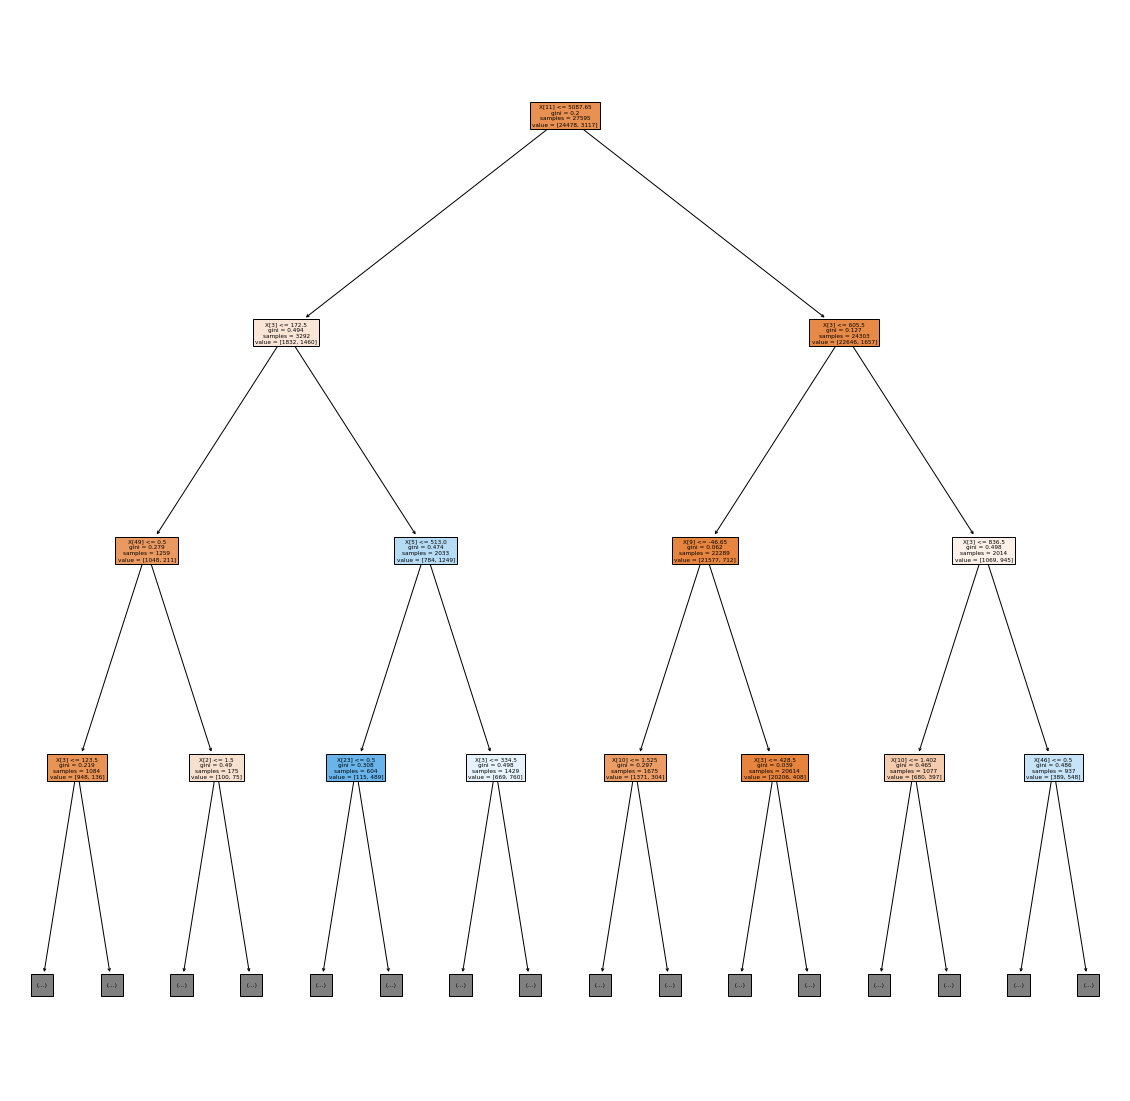

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
plt.figure(figsize =(20,20))
tree.plot_tree(DecisionTree_classifier, filled= True,max_depth=3)


**Decision Tree Hyperparameter Tuning with the help of "GridSearchCV"**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree_classifier = DecisionTreeClassifier(random_state=999)

parameters_DecisionTree = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
             'min_samples_split': [2, 3]}

gridsearch_DecisionTree = GridSearchCV(estimator=DecisionTree_classifier, 
                     param_grid=parameters_DecisionTree, 
                     verbose=1, 
                     scoring='accuracy')

gridsearch_DecisionTree.fit(X_train, y_train);

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:   12.0s finished


In [ ]:
#predicting the best performing parameter
gridsearch_DecisionTree.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}

In [ ]:
gridsearch_DecisionTree.best_score_

0.9129190070664975

**1(b) : Plotting "Confusion Matrix" for all the Models**

**KNN-Model's Confusion Matrix**

In [ ]:
y_prediction = knn_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
knn_confusion_matrix= confusion_matrix(y_test,y_prediction)
print(knn_confusion_matrix)

[[11761   309]
 [  464  1059]]


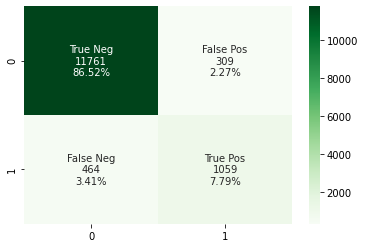

In [ ]:
#Making the Confusion Matrix visually beautiful using "seaborn" library
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                knn_confusion_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     knn_confusion_matrix.flatten()/np.sum(knn_confusion_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in 
            zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(knn_confusion_matrix, annot=labels, fmt='', cmap='Greens')

**Naive Bayes Model's Confusion Matrix**

In [ ]:
y_prediction = gridsearch_NaiveBayes.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
naivebayes_confusion_matrix= confusion_matrix(y_test,y_prediction)
print(naivebayes_confusion_matrix)

[[    0 12070]
 [    0  1523]]


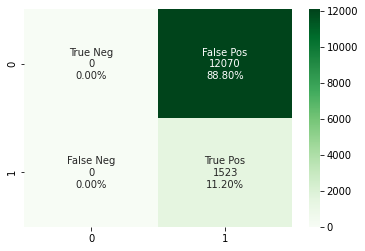

In [ ]:
#Making the Confusion Matrix visually beautiful using "seaborn" library
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                naivebayes_confusion_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     naivebayes_confusion_matrix.flatten()/np.sum(naivebayes_confusion_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in 
            zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(naivebayes_confusion_matrix, annot=labels, fmt='', cmap='Greens')


**Spport Vector Machine Model's Confusion Matrix**

In [ ]:
y_prediction = support_vector_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
svm_confusion_matrix= confusion_matrix(y_test,y_prediction)
print(svm_confusion_matrix)

[[11869   201]
 [ 1168   355]]


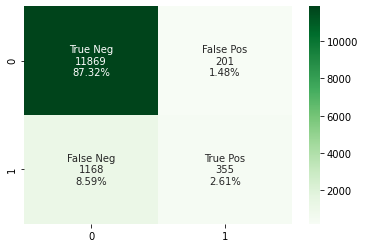

In [ ]:
#Making the Confusion Matrix visually beautiful using "seaborn" library
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                svm_confusion_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     svm_confusion_matrix.flatten()/np.sum(svm_confusion_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in 
            zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(svm_confusion_matrix, annot=labels, fmt='', cmap='Greens')

**Decision Tree Model's Confusion Matrix**

In [ ]:
y_prediction = gridsearch_DecisionTree.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
decisiontree_confusion_matrix= confusion_matrix(y_test,y_prediction)
print(decisiontree_confusion_matrix)

[[11726   344]
 [  790   733]]


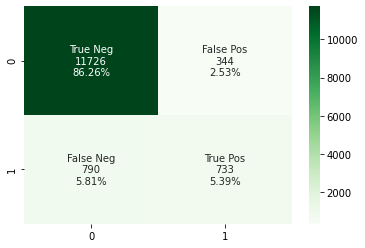

In [ ]:
#Making the Confusion Matrix visually beautiful using "seaborn" library
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                decisiontree_confusion_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     decisiontree_confusion_matrix.flatten()/np.sum(decisiontree_confusion_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in 
            zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(decisiontree_confusion_matrix, annot=labels, fmt='', cmap='Greens')

**1(c) : Comparision of "ROC Curves" of four models**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
svclassifier = SVC(kernel='linear')
svclassifier = SVC(probability=True)
model1 = knn_classifier.fit(X_train, y_train)
model2 = svclassifier.fit(X_train, y_train)
model3 = Naive_Bayes_classifier.fit(X_train, y_train)
model4 = DecisionTree_classifier.fit(X_train, y_train).predict(X_test)
support_vector_classifier = support_vector_classifier.fit(X_train, y_train)

**Prediction Probabilites**

In [ ]:
random_probs = [0 for i in range(len(y_test))]
pred_prob1 = knn_classifier.predict_proba((X_test)[:,1])
pred_prob2 = model2.predict_proba((X_test)[:,1])
pred_prob3 = model3.predict_proba((X_test)[:,1])
pred_prob4 = model4

TypeError: ignored

In [ ]:
y_test.shape
pred_prob1.shape

(13593, 2)

**Computing AUROC and ROC curve values**

Calulating **AUROC** 

**ROC** is the Receiver Operating Characteristic curve.

**AUROC** is the area under the ROC curve

**Printing AUROC scores**

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
r_auc = roc_auc_score(y_test,random_probs)
knn_auc = roc_auc_score(y_test, pred_prob1)
svm_auc = roc_auc_score(y_test, pred_prob2)
nb_auc  = roc_auc_score(y_test, pred_prob3)
dt_auc  = roc_auc_score(y_test, pred_prob4)

ValueError: ignored

In [ ]:
print('Random (chance Prediction: AUROC = %.3f' % (r_auc))
print('KNN: AUROC = %.3f' %(knn_auc))
print('SVM: AUROC = %.3f' %(svm_auc))
print('NaiveBayes: AUROC = %.3f' %(nb_auc))
print('DecisionTree: AUROC = %.3f' %(dt_auc))

Random (chance Prediction: AUROC = 0.500
KNN: AUROC = 0.919
SVM: AUROC = 0.920
NaiveBayes: AUROC = 0.917
DecisionTree: AUROC = 0.739


**Calculate ROC curve**

In [ ]:
r_fpr, r_tpr,_ = roc_curve(y_test,random_probs, pos_label = 1)
knn_fpr, knn_tpr,_ = roc_curve(y_test,pred_prob1,pos_label=1)
svm_fpr, svm_tpr,_ = roc_curve(y_test,pred_prob2,pos_label = 1)
nb_fpr, nb_tpr,_ = roc_curve(y_test,pred_prob3, pos_label=1)
dt_fpr, dt_tpr,_ = roc_curve(y_test,pred_prob4,pos_label=1)

**Plotting the ROC curve using "matplotlib" library**

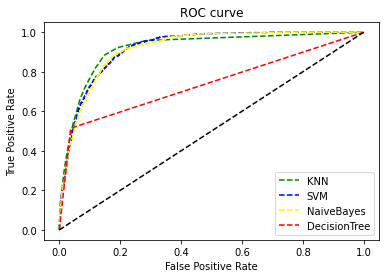

In [ ]:
# matplotlib
import matplotlib.pyplot as plt
# plot roc curves
plt.plot(knn_fpr, knn_tpr, linestyle='--',color='green', label='KNN')
plt.plot(svm_fpr, svm_tpr, linestyle='--',color='blue', label='SVM')
plt.plot(nb_fpr, nb_tpr, linestyle='--', color='yellow',label='NaiveBayes')
plt.plot(dt_fpr, dt_tpr, linestyle='--', color='red', label='DecisionTree')
plt.plot(r_fpr, r_tpr, linestyle='--', color='black')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')
plt.legend()
plt.show();

**1(d) : Summary**

Four models were built using K-Nearest Neighbors, Support Vector Machine , Decision Tree and Naïve Bayes algorithms and a confusion-matrix is plotted through which the  accuracy of the model can be easily visualized. Also, the hyperparameter tuning of the models has been implemented using “GridSearchCV” to improve accuracy. A user defined function namely “encode_and_bind” has been created to implement one-hot-encoding. From the plotted ROC curve, it is clear that roc curve of SVM model is far left and top with an AUC score of 92.0. This indicates that the model has high recall compared to other models. Also, the roc curve of KNN model is between the roc curve of SVM and Naïve Bayes model with an AUC score of 91.9 and 91.7 respectively, indicating high recall. Among all the models built, the accuracy of decision tree model is high(91.51) and its AUC score is low(73.9) which indicates less recall. The accuracy of the model is not a good measure to evaluate the performance of the model as this is a classification task and the data is very imbalanced. This clearly indicates that the performance of the model is  determined by the AUC score.




**2(a) : Building a model using "Decision Tree algorithm" for Multi-class Classification**

**Importing required libraries and converting the dataset into dataframe object using "pandas" python data analysis library.**

In [ ]:
import pandas as pd 
import numpy as np
df = pd.read_csv('bank-additional-full.csv',sep = ';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


**Label Encoding of 'month', 'day_of_week' and 'y' features**

In [ ]:
from sklearn import preprocessing
label_encoder1 = preprocessing.LabelEncoder()
label_encoder2 = preprocessing.LabelEncoder()
label_encoder3 = preprocessing.LabelEncoder()
df['month'] = label_encoder1.fit_transform(df['month'].astype(str)) 
df['day_of_week'] = label_encoder2.fit_transform(df['day_of_week'].astype(str))
df['y']= label_encoder3.fit_transform(df['y'].astype(str))

**Implementing our own user defined function namely "encode_and_bind" which will perform "One-hot-encoding" and binds those columns to our original dataframe.**

In [ ]:
def encode_and_bind(df,feature_to_encode):
    dummies = pd.get_dummies(df[[feature_to_encode]])
    df = pd.concat([df,dummies],axis=1)
    df = df.drop([feature_to_encode],axis=1)
    return(df)

**Selecting the categorical columns which are not ordinal for "One-hot-encoding".**

In [ ]:
features_to_encode = ['job', 'marital', 'education', 'default','housing','loan','contact','poutcome'] 
for feature in features_to_encode:
    df = encode_and_bind(df,feature)

In [ ]:
df

,age,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,6,1,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
1,57,6,1,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0
2,37,6,1,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0
3,40,6,1,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
4,56,6,1,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,7,0,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0
41184,46,7,0,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
41185,56,7,0,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0
41186,44,7,0,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0


In [ ]:
#Checking the number of rows and columns in the dataset
df.shape

(41188, 51)

In [ ]:
#Creating a dataframe with all the training data excluding the target column ie.,poutcome.
X = df.drop(['poutcome_failure','poutcome_nonexistent','poutcome_success'],axis=1)
#Checking that the target variable has been removed
X.head()

,age,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone
0,56,6,1,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1
1,57,6,1,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1
2,37,6,1,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1
3,40,6,1,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1
4,56,6,1,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1


In [ ]:
#Here, We are inserting the ‘poutcome_failure’,'poutcome_nonexistent','poutcome_success' columns into our target variable (y).
#In this step we have successfully separated the target values.
y = df[df.columns[48:51]].values

In [ ]:
y

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0]], dtype=uint8)

**Decision Tree Model**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree_classifier = DecisionTreeClassifier()
DecisionTree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_prediction = DecisionTree_classifier.predict(X_test)

**Decision Tree Representation using "Matplotlib" python library.**

[Text(446.4, 978.48, 'X[6] <= 0.5\ngini = 0.162\nsamples = 27595\nvalue = [[24767, 2828]\n[3767, 23828]\n[26656, 939]]'),
 Text(223.2, 761.0400000000001, 'gini = 0.0\nsamples = 23828\nvalue = [[23828, 0]\n[0, 23828]\n[23828, 0]]'),
 Text(669.5999999999999, 761.0400000000001, 'X[5] <= 512.5\ngini = 0.25\nsamples = 3767\nvalue = [[939, 2828]\n[3767, 0]\n[2828, 939]]'),
 Text(446.4, 543.6, 'X[6] <= 1.5\ngini = 0.106\nsamples = 1029\nvalue = [[939, 90]\n[1029, 0]\n[90, 939]]'),
 Text(223.2, 326.1600000000001, 'gini = 0.0\nsamples = 597\nvalue = [[597, 0]\n[597, 0]\n[0, 597]]'),
 Text(669.5999999999999, 326.1600000000001, 'X[5] <= 6.5\ngini = 0.22\nsamples = 432\nvalue = [[342, 90]\n[432, 0]\n[90, 342]]'),
 Text(446.4, 108.72000000000003, '\n  (...)  \n'),
 Text(892.8, 108.72000000000003, '\n  (...)  \n'),
 Text(892.8, 543.6, 'gini = 0.0\nsamples = 2738\nvalue = [[0, 2738]\n[2738, 0]\n[2738, 0]]')]

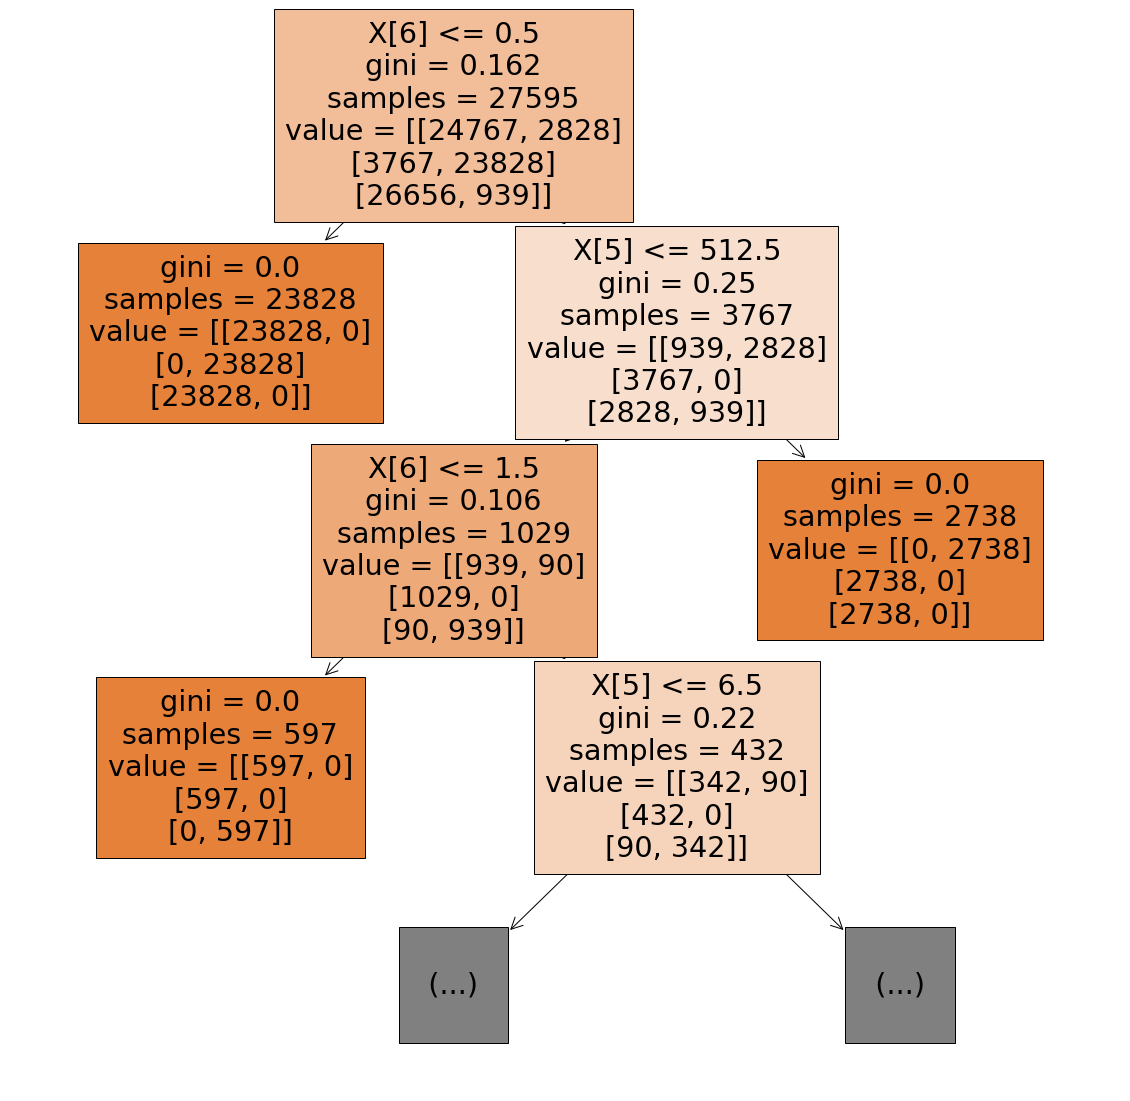

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
plt.figure(figsize =(20,20))
tree.plot_tree(DecisionTree_classifier, filled= True, max_depth=3)

**2(b) : Plotting "ROC" Curves using one-versus-one comparisons.**

For representing **"ROC curves"** using OnevsOne comparision , 

I am dividing the **"poutcome"** column in to three different classes

**class1:** failure,nonexistent

**class2:** failure,success

**class3:** nonexistent,success

In [ ]:
import pandas as pd 
import numpy as np
df = pd.read_csv('bank-additional-full.csv',sep = ';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


**Label Encoding of 'month' and 'day_of_week' features**

In [ ]:
from sklearn import preprocessing
label_encoder1 = preprocessing.LabelEncoder()
label_encoder2 = preprocessing.LabelEncoder()
df['month'] = label_encoder1.fit_transform(df['month'].astype(str)) 
df['day_of_week'] = label_encoder2.fit_transform(df['day_of_week'].astype(str))
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,6,1,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,6,1,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,6,1,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,6,1,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,6,1,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,7,0,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,7,0,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,7,0,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,7,0,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


**Implementing our own user defined function namely "encode_and_bind" which will perform "One-hot-encoding" and binds those columns to our original dataframe.**

In [ ]:
def encode_and_bind(df,feature_to_encode):
    dummies = pd.get_dummies(df[[feature_to_encode]])
    df = pd.concat([df,dummies],axis=1)
    df = df.drop([feature_to_encode],axis=1)
    return(df)

**Selecting the categorical columns which are not ordinal for "One-hot-encoding".**

In [ ]:
features_to_encode = ['job', 'marital', 'education', 'default','housing','loan','contact'] 
for feature in features_to_encode:
    df = encode_and_bind(df,feature)

In [ ]:
df

,age,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone
0,56,6,1,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1
1,57,6,1,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1
2,37,6,1,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1
3,40,6,1,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1
4,56,6,1,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,7,0,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0
41184,46,7,0,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
41185,56,7,0,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0
41186,44,7,0,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0


In [ ]:
df.y = df.y.map({'no':0, 'yes':1}).astype('uint8')
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
age,56,57,37,40,56,45,59,41,24,25
month,6,6,6,6,6,6,6,6,6,6
day_of_week,1,1,1,1,1,1,1,1,1,1
duration,261,149,226,151,307,198,139,217,380,50
campaign,1,1,1,1,1,1,1,1,1,1
pdays,999,999,999,999,999,999,999,999,999,999
previous,0,0,0,0,0,0,0,0,0,0
poutcome,nonexistent,nonexistent,nonexistent,nonexistent,nonexistent,nonexistent,nonexistent,nonexistent,nonexistent,nonexistent
emp.var.rate,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1
cons.price.idx,93.994,93.994,93.994,93.994,93.994,93.994,93.994,93.994,93.994,93.994


In [ ]:
#Checking the number of rows and columns in the dataset
df.shape

(41188, 49)

In [ ]:
#Creating a dataframe with all the training data excluding the target column ie.,poutcome.
X1 = df.drop(['poutcome'],axis=1)

In [ ]:
#Here, We are inserting the ‘poutcome’ column which contains 'failure,'nonexistent','success' values into our target variable (y1).
#In this step we have successfully separated the target values.
y1 = df['poutcome']

In [ ]:
y1

0        nonexistent
1        nonexistent
2        nonexistent
3        nonexistent
4        nonexistent
            ...     
41183    nonexistent
41184    nonexistent
41185    nonexistent
41186    nonexistent
41187        failure
Name: poutcome, Length: 41188, dtype: object

**Using "Decision Tree" Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33,random_state = 2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
multi = DecisionTreeClassifier(max_depth=15,max_features=7,random_state=3)
multi.fit(X1_train,y1_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=3, splitter='best')

In [ ]:
#Implementing Decision Tree Classifier for the the three classes c1,c2,c3
#Filtering the rows of the dataset which contains only class 1 values ie., failure,nonexistent
yc1_train = y1_train[y1_train.isin(['failure','nonexistent'])]
xc1_train = X1_train.loc[yc1_train.index]
yc1_test  = y1_test.isin(['failure','nonexistent'])
xc1_test  = X1_test.loc[yc1_test.index]
# Decision Tree Classifier for class c1
from sklearn.tree import DecisionTreeClassifier
classifier1 = DecisionTreeClassifier(max_depth=15,max_features=7,random_state=3)
cl = classifier1.fit(xc1_train.values,yc1_train.values)

In [ ]:
#Filtering the rows of the dataset which contains only class 2 values ie., failure,success
yc2_train = y1_train[y1_train.isin(['failure','success'])]
xc2_train = X1_train.loc[yc2_train.index]
yc2_test  = y1_test.isin(['failure','success'])
xc2_test  = X1_test.loc[yc1_test.index]
# Decision Tree Classifier for class c1
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(max_depth=15,max_features=7,random_state=3)
c2 = classifier2.fit(xc2_train.values, yc2_train.values)

In [ ]:
#Filtering the rows of the dataset which contains only class 3 values ie., nonexistent,success
yc3_train = y1_train[y1_train.isin(['nonexistent','success'])]
xc3_train = X1_train.loc[yc3_train.index]
yc3_test  = y1_test.isin(['nonexistent','success'])
xc3_test  = X1_test.loc[yc3_test.index]
# Decision Tree Classifier for class c1
from sklearn.tree import DecisionTreeClassifier
classifier3 = DecisionTreeClassifier(max_depth=15,max_features=7,random_state=3)
c3= classifier3.fit(xc3_train.values, yc3_train.values)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

**Prediction Probabilities**

In [ ]:
c1 = classifier1.fit(xc1_train,yc1_train)
c2 = classifier2.fit(xc2_train,yc2_train)
c3 = classifier3.fit(xc3_train,yc3_train)
pred_prob1 = c1.predict_proba(xc1_test)[:,1]
pred_prob2 = c2.predict_proba(xc2_test)[:,1]
pred_prob3 = c3.predict_proba(xc3_test)[:,1]

**ROC Curve comparision for three classes**

In [ ]:
from sklearn.metrics import roc_curve
import numpy as np
dtc1_fpr, dtc1_tpr,_ = roc_curve(yc1_test, pred_prob1,pos_label=1)
dtc2_fpr, dtc2_tpr,_ = roc_curve(yc2_test, pred_prob2,pos_label=1)
dtc3_fpr, dtc3_tpr,_ = roc_curve(yc3_test, pred_prob3,pos_label=1) 

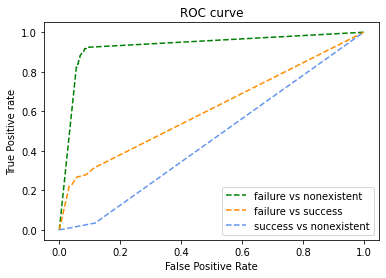

In [ ]:
# matplotlib
import matplotlib.pyplot as plt
# plot roc curves
plt.plot(dtc1_fpr, dtc1_tpr, linestyle='--',color='green', label='failure vs nonexistent')
plt.plot(dtc2_fpr, dtc2_tpr, linestyle='--',color='darkorange', label= 'failure vs success')
plt.plot(dtc3_fpr, dtc3_tpr, linestyle='--', color='cornflowerblue',label='success vs nonexistent')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend()
plt.show();

**Calculation of the AUC using the one-versus-one scheme, using both the 
"macro average" and a "prevalence-weighted average".**

In [ ]:
import pandas as pd 
import numpy as np
df = pd.read_csv('bank-additional-full.csv', sep = ';')
df 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


**Label Encoding of 'month' and 'day_of_week' features**

In [ ]:
from sklearn import preprocessing
label_encoder1 = preprocessing.LabelEncoder()
label_encoder2 = preprocessing.LabelEncoder()
df['month'] = label_encoder1.fit_transform(df['month'].astype(str)) 
df['day_of_week'] = label_encoder2.fit_transform(df['day_of_week'].astype(str))

**Implementing our own user defined function namely "encode_and_bind" which will perform "One-hot-encoding" and binds those columns to our original dataframe.**

In [ ]:
def encode_and_bind(df,feature_to_encode):
    dummies = pd.get_dummies(df[[feature_to_encode]])
    df = pd.concat([df,dummies],axis=1)
    df = df.drop([feature_to_encode],axis=1)
    return(df)

In [ ]:
features_to_encode = ['job', 'marital', 'education', 'default','housing','loan','contact'] 
for feature in features_to_encode:
    df = encode_and_bind(df,feature)

In [ ]:
df

,age,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone
0,56,6,1,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1
1,57,6,1,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1
2,37,6,1,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1
3,40,6,1,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1
4,56,6,1,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,7,0,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0
41184,46,7,0,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
41185,56,7,0,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0
41186,44,7,0,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0


In [ ]:
df.y = df.y.map({'no':0, 'yes':1}).astype('uint8')
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
age,56,57,37,40,56,45,59,41,24,25
month,6,6,6,6,6,6,6,6,6,6
day_of_week,1,1,1,1,1,1,1,1,1,1
duration,261,149,226,151,307,198,139,217,380,50
campaign,1,1,1,1,1,1,1,1,1,1
pdays,999,999,999,999,999,999,999,999,999,999
previous,0,0,0,0,0,0,0,0,0,0
poutcome,nonexistent,nonexistent,nonexistent,nonexistent,nonexistent,nonexistent,nonexistent,nonexistent,nonexistent,nonexistent
emp.var.rate,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1
cons.price.idx,93.994,93.994,93.994,93.994,93.994,93.994,93.994,93.994,93.994,93.994


In [ ]:
#Checking the number of rows and columns in the dataset
df.shape

(41188, 49)

In [ ]:
#Creating a dataframe with all the training data excluding the target column ie.,Outcome.
X = df.drop(['poutcome'],axis=1)
#Checking that the target variable has been removed
X.head()

,age,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone
0,56,6,1,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1
1,57,6,1,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1
2,37,6,1,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1
3,40,6,1,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1
4,56,6,1,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1


In [ ]:
#Here, We are inserting the ‘poutcome_failure’,'poutcome_nonexistent','poutcome_success' columns into our target variable (y).
#In this step we have successfully separated the target values.
y = df['poutcome']

In [ ]:
y

0        nonexistent
1        nonexistent
2        nonexistent
3        nonexistent
4        nonexistent
            ...     
41183    nonexistent
41184    nonexistent
41185    nonexistent
41186    nonexistent
41187        failure
Name: poutcome, Length: 41188, dtype: object

**Importing DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
pred_prob1 = model.predict_proba(X_test)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

**Calculation of AUC score using macro average**

In [ ]:
macro_average_auc = roc_auc_score(y_test, pred_prob1,multi_class='ovo',average='macro')

In [ ]:
print('Macro_average: AUC SCORE = %.3f' % (macro_average_auc))

Macro_average: AUC SCORE = 0.990


**Calculation of AUC score using prevalenced-weighted-average**

In [ ]:
prevalence_weighted_average_auc =  roc_auc_score(y_test, pred_prob1,multi_class='ovo',average='weighted')

In [ ]:
print('Prevalence_weighted_average: AUC = %.3f' % (prevalence_weighted_average_auc))

Prevalence_weighted_average: AUC = 0.994


**2(d) : Summary**

The main difference between multi-class and binary classification problem is the approach taken for predicting whether an instance belongs to a particular label or not.In multi-class, OneVsOne method is used to train the decision tree model classifiers,by which ROC curve can be plotted for each of the three classes. The labels can be predicted directly using binary classification where as in case of OneVsOne method,the classifiers are initially trained to give votes for determining the most appropriate class. Multi-class classification contains three or more categorical values in the class label,but binary classification contains only two class label values.



